#**Project**

In this project, our aim is to building a model for predicting wine qualities. Our label will be quality column. Do not forget, this is a Classification problem!

##**Steps**

* Read the winequality.csv file and describe it.
* Make at least 4 different analysis on Exploratory Data Analysis section.
* Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
* Define appropriate evaluation metric for our case (classification).
* Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
* Check if is there any overfitting and underfitting. Interpret your results and try to overcome if there is any problem in a new section.
* Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
* Analyse and compare results of 3 algorithms.
* Select best performing model based on evaluation metric you chose on test dataset.

##***Hüseyin Şahin, huseyinsahn@gmail.com***




#**Importing Dataset**

In [ ]:
# Importing libraries and reading the file
import pandas as pd
import numpy as np

df_wine = pd.read_csv("winequality.csv")

df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Viewing the data statistics
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Checking missing values
df_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Removing of missing values
df_wine.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#**Exploratory Data Analysis**

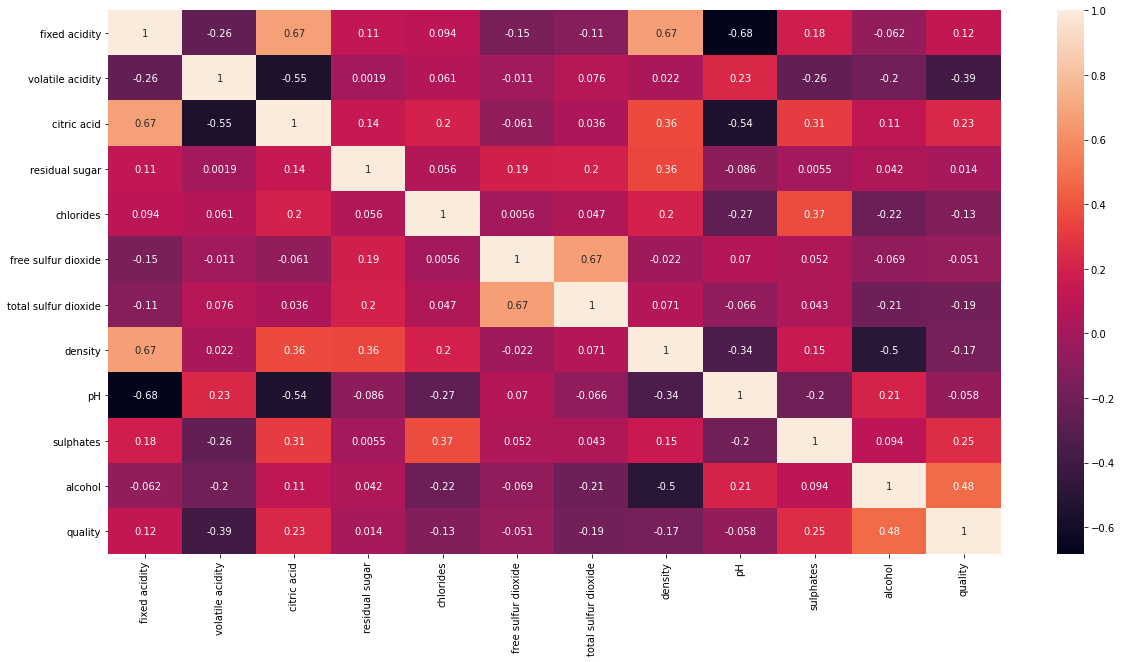

In [ ]:
# Obtaining the correlations of each feature in the dataset
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df_wine.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))

g=sns.heatmap(df_wine[top_corr_features].corr(),annot=True)

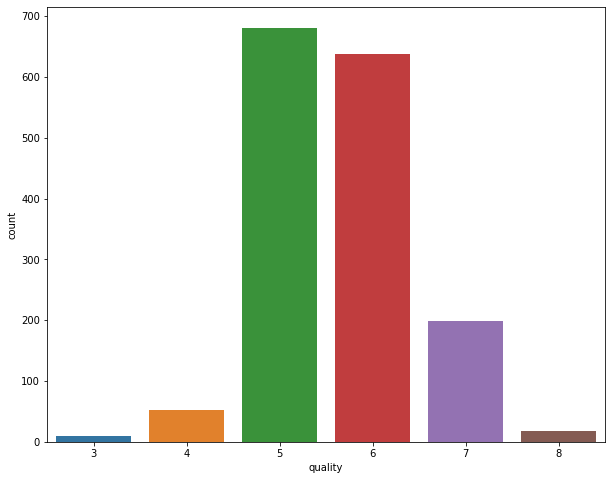

In [ ]:
# Label distribution

plt.figure(figsize=(10, 8))
sns.countplot(x ='quality', data = df_wine)
plt.show()

C:\Users\HUSEYIN\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

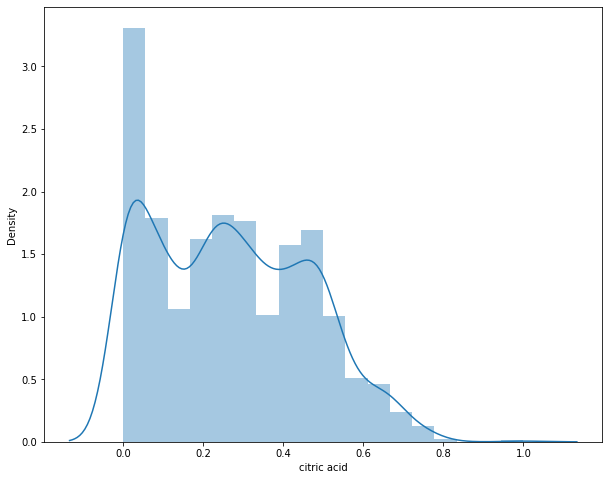

In [ ]:
# EDA using distplot
plt.figure(figsize=(10, 8))
sns.distplot(df_wine["citric acid"])

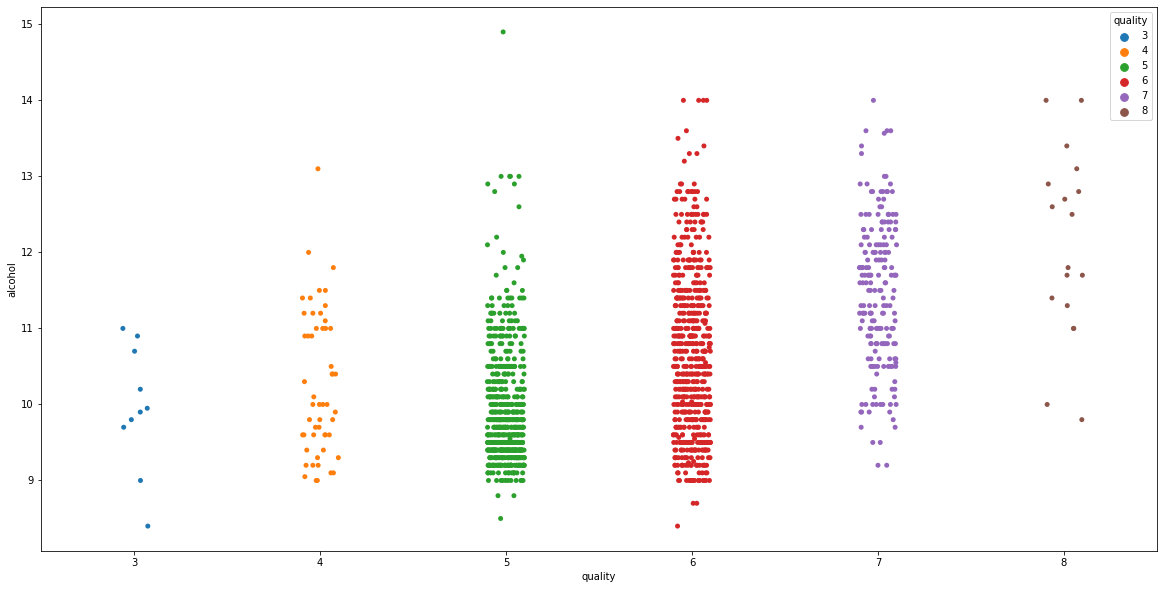

In [ ]:
#EDA using Stripplot
f,ax = plt.subplots(figsize =(20,10))
sns.stripplot(x="quality" , y="alcohol", hue="quality",data=df_wine,ax=ax)
plt.show()

#**Preprocessing the Data**

In [ ]:
# Outlier Detection
from scipy import stats

z = np.abs(stats.zscore(df_wine))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


In [ ]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

148

In [ ]:
new_wine = df_wine.drop(outliers,axis = 0).reset_index(drop = False)
display(new_wine)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1447,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1448,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1449,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# Model building
from sklearn import preprocessing

X = df_wine.drop(['fixed acidity'], axis = 1) # independent variable
y = df_wine[['fixed acidity']] #dependent variable

In [ ]:
#Scaling the data (Standardization)

X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns)

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns = y.columns)

X_s

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
df_wine["label"] = label_encoder.fit_transform(df_wine["quality"])
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [ ]:
df_wine["label"].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: label, dtype: int64

In [ ]:
categories = list(set(df_wine.quality))
df_wine.drop(["quality"], axis=1, inplace=True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [ ]:
# Locating features and label
X,y = df_wine.iloc[:,:-1], df_wine.iloc[:,-1]

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
...,...,...,...,...,...,...,...,...,...,...,...
801,8.6,0.550,0.09,3.30,0.068,8.0,17.0,0.99735,3.23,0.44,10.0
61,7.7,0.690,0.49,1.80,0.115,20.0,112.0,0.99680,3.21,0.71,9.3
431,7.8,0.550,0.35,2.20,0.074,21.0,66.0,0.99740,3.25,0.56,9.2
1210,6.8,0.650,0.02,2.10,0.078,8.0,15.0,0.99498,3.35,0.62,10.4


#**ML Application**

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)

print("Accuracy of train: {} ".format(clf.score(X_train,y_train)))
print("Accuracy of test: {} ".format(clf.score(X_test,y_test)))
print("\nBias for training: {} ".format(1-clf.score(X_train,y_train)))
print("Bias for test: {} ".format(1-clf.score(X_test,y_test)))
print("\nVariance: {} ".format((1-clf.score(X_test,y_test))-(1-clf.score(X_train,y_train))))

Accuracy of train: 0.8695263628239499 
Accuracy of test: 0.6020833333333333 

Bias for training: 0.1304736371760501 
Bias for test: 0.3979166666666667 

Variance: 0.2674430294906166 


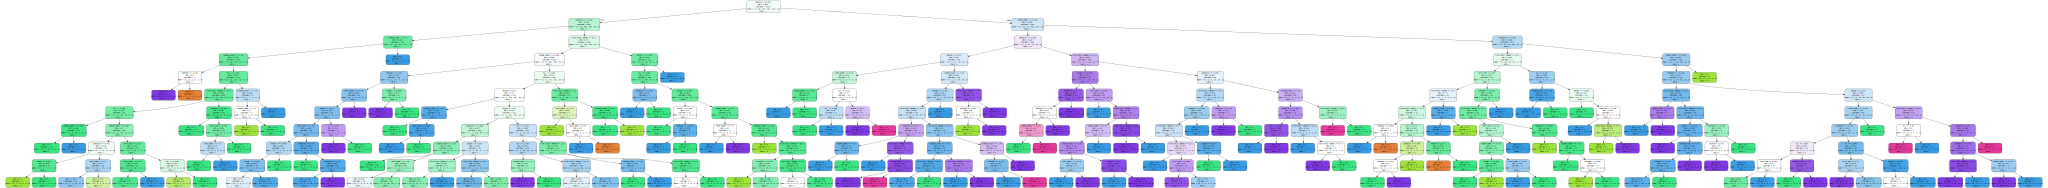

In [ ]:
# Visualization
import os
from sklearn.tree import export_graphviz
import graphviz

os.environ["PATH"] += ';' + r'C:\Users\HUSEYIN\anaconda3\Library\bin\graphviz'

dot_df = export_graphviz(clf, out_file=None,
                     feature_names=X.columns,
                     class_names=str(categories),
                     filled=True, rounded=True)
graph = graphviz.Source(dot_df)
graph

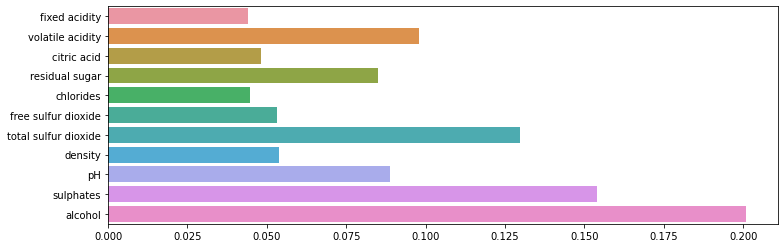

In [ ]:
# Feature Importance
plt.figure(figsize=(12, 4))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [ ]:
# For Classification Report Plotting
y = np.random.randint(low=0, high=10, size=100)
y_p = np.random.randint(low=0, high=10, size=100)

def plot_classification_report(y_tru, y_prd, figsize=(10, 5), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        15
           2       0.71      0.69      0.70       208
           3       0.61      0.61      0.61       204
           4       0.38      0.47      0.42        45
           5       0.00      0.00      0.00         5

    accuracy                           0.60       480
   macro avg       0.28      0.29      0.29       480
weighted avg       0.60      0.60      0.60       480



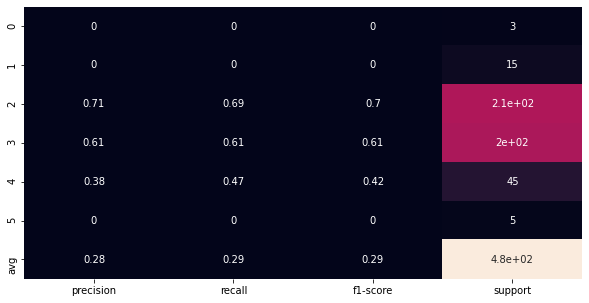

In [ ]:
# Classification Report
pred = clf.predict(X_test)
print(classification_report(y_test,pred))
plot_classification_report(y_test, pred)

In [ ]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.28211281494003054
Recall = 0.29448529411764707
Accuracy = 0.6020833333333333
F1 Score = 0.28744158392224217


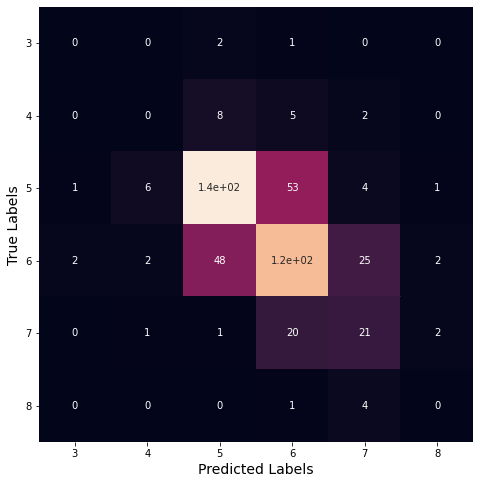

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 10)
ax.yaxis.set_ticklabels(categories, fontsize = 10, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 14)
ax.set_ylabel('True Labels',fontsize = 14)
plt.show()

In [ ]:
#Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
lr = LogisticRegression()
clf = Pipeline([('standardize', scaler),('log_reg', lr)])

clf.fit(X_train, y_train)
print("Accuracy of train: {} ".format(clf.score(X_train,y_train)))
print("Accuracy of test: {} ".format(clf.score(X_test,y_test)))
print("\nBias for training: {} ".format(1-clf.score(X_train,y_train)))
print("Bias for test: {} ".format(1-clf.score(X_test,y_test)))

Accuracy of train: 0.6005361930294906 
Accuracy of test: 0.6208333333333333 

Bias for training: 0.3994638069705094 
Bias for test: 0.37916666666666665 


C:\Users\HUSEYIN\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HUSEYIN\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HUSEYIN\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        15
           2       0.68      0.75      0.72       208
           3       0.60      0.61      0.61       204
           4       0.39      0.36      0.37        45
           5       0.00      0.00      0.00         5

    accuracy                           0.62       480
   macro avg       0.28      0.29      0.28       480
weighted avg       0.59      0.62      0.60       480



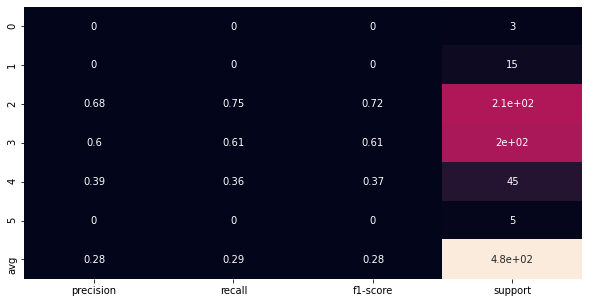

In [ ]:
# Classification Report
pred = clf.predict(X_test)
print(classification_report(y_test,pred))
plot_classification_report(y_test, pred)

In [ ]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.27848978708218536
Recall = 0.28718472431707726
Accuracy = 0.6208333333333333
F1 Score = 0.2823858128230134


C:\Users\HUSEYIN\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


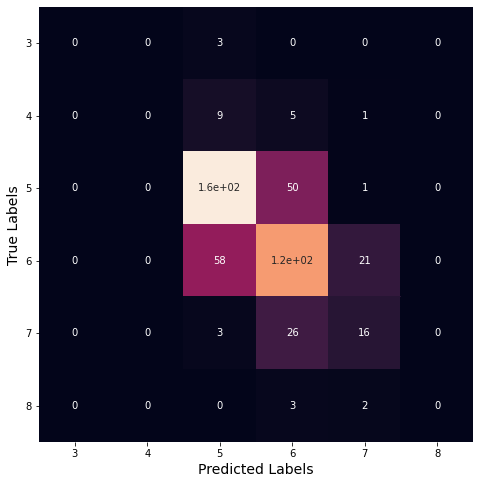

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 10)
ax.yaxis.set_ticklabels(categories, fontsize = 10, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 14)
ax.set_ylabel('True Labels',fontsize = 14)
plt.show()

In [ ]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)
print("Accuracy of train: {} ".format(clf.score(X_train,y_train)))
print("Accuracy of test: {} ".format(clf.score(X_test,y_test)))
print("\nBias for training: {} ".format(1-clf.score(X_train,y_train)))
print("Bias for test: {} ".format(1-clf.score(X_test,y_test)))

Accuracy of train: 0.7453083109919572 
Accuracy of test: 0.45208333333333334 

Bias for training: 0.25469168900804284 
Bias for test: 0.5479166666666666 


              precision    recall  f1-score   support

           0       0.17      0.33      0.22         3
           1       0.00      0.00      0.00        15
           2       0.53      0.59      0.56       208
           3       0.47      0.41      0.43       204
           4       0.27      0.22      0.24        45
           5       0.00      0.00      0.00         5

    accuracy                           0.45       480
   macro avg       0.24      0.26      0.24       480
weighted avg       0.45      0.45      0.45       480



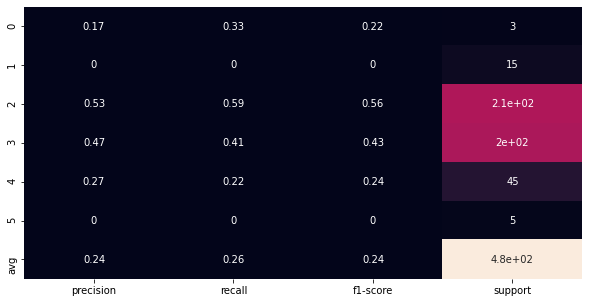

In [ ]:
# Classification Report
pred = clf.predict(X_test)
print(classification_report(y_test,pred))
plot_classification_report(y_test, pred)

In [ ]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.23814501623490383
Recall = 0.25896074241662476
Accuracy = 0.45208333333333334
F1 Score = 0.24287345350690878


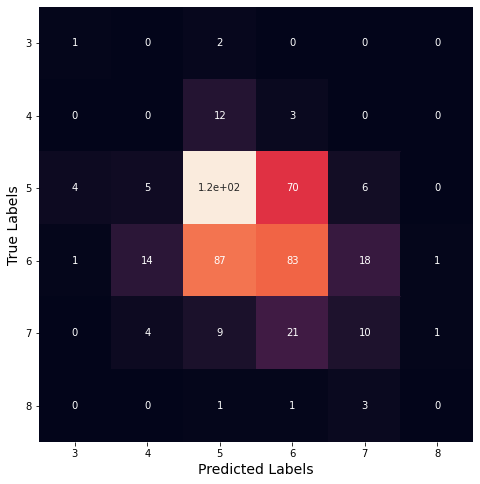

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 10)
ax.yaxis.set_ticklabels(categories, fontsize = 10, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 14)
ax.set_ylabel('True Labels',fontsize = 14)
plt.show()

In [ ]:
#XGBoost Algorithm 
import xgboost as xgb

dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':10, 
         'eta':1, 
         'objective':'multi:softprob', 
         'eval_metric':'mlogloss',
         'num_class':6}

num_round = 6
model = xgb.train(param, dmatrix_train, num_round)

categories

[3, 4, 5, 6, 7, 8]

In [ ]:
#Predictions
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.0081407 , 0.00306838, 0.84814024, 0.13094759, 0.00816884,
        0.00153425],
       [0.01688144, 0.07740854, 0.77867967, 0.0944256 , 0.02301948,
        0.00958521],
       [0.00142672, 0.00190365, 0.00372346, 0.03183372, 0.95761544,
        0.00349704],
       [0.00132053, 0.01106054, 0.8895761 , 0.09373036, 0.00282101,
        0.0014915 ],
       [0.00500841, 0.00229587, 0.959758  , 0.02294482, 0.00571488,
        0.00427807],
       [0.002317  , 0.00286904, 0.7909731 , 0.19769965, 0.00306029,
        0.00308084],
       [0.00498752, 0.00637827, 0.7268386 , 0.24543485, 0.00667144,
        0.00968931],
       [0.00917736, 0.00466705, 0.03638093, 0.8941448 , 0.05271534,
        0.00291449],
       [0.00565606, 0.12285822, 0.8381919 , 0.02582128, 0.00406881,
        0.0034037 ],
       [0.00433875, 0.00699951, 0.7757985 , 0.20315295, 0.00506437,
        0.00464593]], dtype=float32)

In [ ]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([2, 2, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 2, 3, 4, 2, 2, 3, 3, 3,
       3, 4, 2, 2, 2, 4, 2, 3, 2, 3, 2, 2, 4, 4, 2, 2, 3, 4, 2, 4, 4, 3,
       3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 4, 2, 2, 3, 3, 3, 2, 3,
       2, 2, 4, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 4, 3, 2, 4, 3, 3, 3, 4, 2,
       2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 3, 4, 3, 3, 3, 2, 2, 2, 2, 3, 2,
       3, 2, 5, 2, 3, 3, 2, 4, 4, 3, 2, 2, 2, 2, 3, 4, 2, 2, 4, 3, 3, 2,
       3, 4, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 5, 3, 2, 2, 3, 4, 2, 2,
       3, 2, 3, 3, 3, 4, 3, 3, 4, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 4, 4, 3,
       2, 4, 4, 2, 2, 3, 3, 4, 5, 2, 3, 3, 2, 3, 4, 3, 3, 3, 2, 2, 2, 2,
       3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 2, 3, 2, 2, 3, 4, 3, 2,
       2, 2, 4, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 4, 3, 3, 4, 4, 3, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 3, 2, 2, 2, 4, 2, 3, 2, 3,
       2, 1, 2, 2, 3, 4, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 3, 3, 2, 4, 3, 2,
       2, 2, 4, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3,

#**Evaluation**

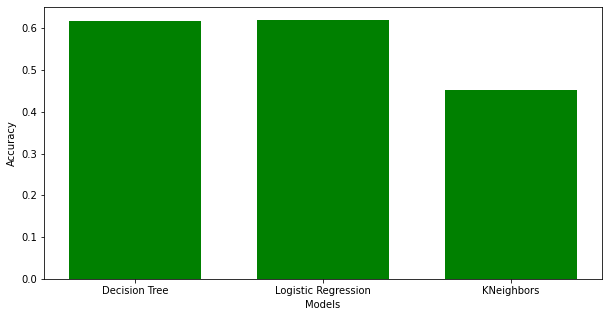

In [ ]:
data = {'Decision Tree':0.618, 'Logistic Regression':0.620, 'KNeighbors':0.452} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='green',  
        width = 0.7) 
  
plt.xlabel("Models") 
plt.ylabel("Accuracy")  
plt.show()

It is Logistic regression with 62% accuracy that gives the best result from Decision Tree, Logistic Regression and KNeighbors algorithms.